In [1]:
%pip install pysmiles

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
from pysmiles import read_smiles
import networkx as nx
import matplotlib.pyplot as plt

## NeurIPS Polimer Challenge 2025

In [11]:
df = pd.read_csv("../../kaggle/input/train.csv", sep='\t' if '\t' in open("../../kaggle/input/train.csv").readline() else ',')

polymers_root = "../../kaggle/NeurIPS"
os.makedirs(polymers_root, exist_ok=True)

error_ids = []

for index, row in df.iterrows():
    polymer_id = str(row['id'])
    print(polymer_id)
    smiles = row['SMILES']

    if pd.isna(smiles) or not isinstance(smiles, str) or smiles.strip() == "":
        print(f"SKIP {polymer_id}: SMILES is missing")
        error_ids.append(polymer_id)
        continue

    try:
        mol = read_smiles(smiles)

        polymer_dir = os.path.join(polymers_root, polymer_id)
        os.makedirs(polymer_dir, exist_ok=True)

        adj = nx.to_numpy_array(mol)
        pd.DataFrame(adj).to_csv(os.path.join(polymer_dir, "adjacency.csv"), index=False)

        atom_dict = nx.get_node_attributes(mol, "element")
        atom_df = pd.DataFrame(list(atom_dict.items()), columns=["node", "element"])
        atom_df.to_csv(os.path.join(polymer_dir, "atoms.csv"), index=False)

        pos = nx.spring_layout(mol)
        #plt.figure(figsize=(6, 6))
        #nx.draw(mol, with_labels=True, labels=atom_dict, pos=pos, node_size=500, font_size=8)
        #plt.gca().set_aspect('equal')
        #plt.axis('off')
        #plt.tight_layout()
        #plt.savefig(os.path.join(polymer_dir, "molecule.png"))
        #plt.close()

        details_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
        details_df = row[details_cols].to_frame().T  
        details_df.to_csv(os.path.join(polymer_dir, "details.csv"), index=False)


        print(f"Processed {polymer_id}")

    except Exception as e:
        print(f"ERROR processing {polymer_id}: {e}")
        error_ids.append(polymer_id)

pd.DataFrame(error_ids, columns=["id"]).to_csv(os.path.join(polymers_root, "Falseparse.csv"), index=False)



87817
Processed 87817
106919
Processed 106919
388772
Processed 388772
519416
Processed 519416
539187
Processed 539187
950661
Processed 950661
1012066
Processed 1012066
1022104
Processed 1022104
1722264
Processed 1722264
2265305
Processed 2265305
2986007
Processed 2986007
3013292
Processed 3013292
3053950
Processed 3053950
3128201
Processed 3128201
3139746
Processed 3139746
3254580
Processed 3254580
4600132
Processed 4600132
4658296
Processed 4658296
4834929
Processed 4834929
5118841
Processed 5118841
5350166
Processed 5350166
5650517
Processed 5650517
5661484
Processed 5661484
5709902
Processed 5709902
5724071
Processed 5724071
5857263
Processed 5857263
5905810
Processed 5905810
5966923
Processed 5966923
6019988
Processed 6019988
6102563
Processed 6102563
6259923
Processed 6259923
6645418
Processed 6645418
6665789
Processed 6665789
7586800
Processed 7586800
7687820
Processed 7687820
8689461
Processed 8689461
8973725
Processed 8973725
9231170
Processed 9231170
9284896
Processed 9284896


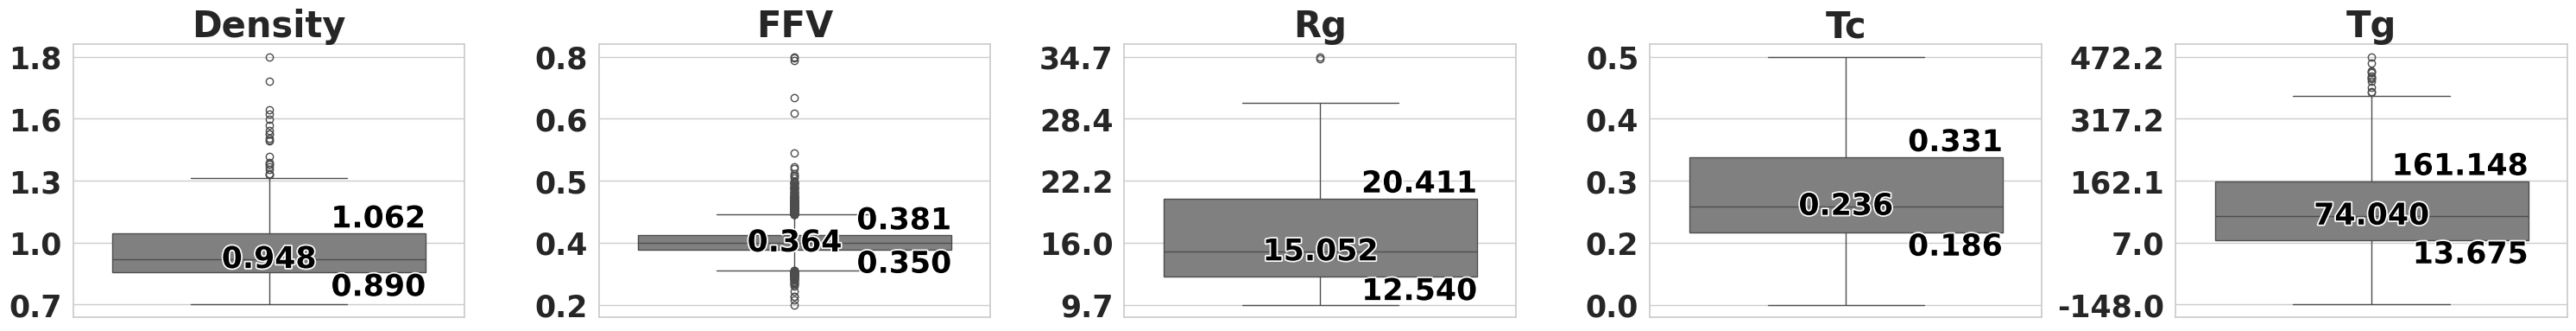

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as path_effects

df = pd.read_csv(
    "../../kaggle/input/train.csv",
    sep='\t' if '\t' in open("../../kaggle/input/train.csv").readline() else ','
)

cols = ['Density', 'FFV', 'Rg', 'Tc', 'Tg']

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 5, figsize=(30, 4))

for ax, col in zip(axes, cols):
    sns.boxplot(y=df[col], ax=ax, color="grey")

    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.50)
    q3 = df[col].quantile(0.75)

    ymin = df[col].min()
    ymax = df[col].max()
    yticks = np.linspace(ymin, ymax, 5)
    ax.set_yticks(yticks)
    ax.set_yticklabels([f"{y:.1f}" for y in yticks])

    pe = [path_effects.withStroke(linewidth=2.5, foreground='white')]

    ax.text(
        0.9, q1, f"{q1:.3f}",
        ha="right", va="top",
        fontsize=25, fontweight="bold", color="black",
        path_effects=pe,
        transform=ax.get_yaxis_transform(which='grid')
    )
    ax.text(
        0.5, q2, f"{q2:.3f}",
        ha="center", va="center",
        fontsize=25, fontweight="bold", color="black",
        path_effects=pe,
        transform=ax.get_yaxis_transform(which='grid')
    )
    ax.text(
        0.9, q3, f"{q3:.3f}",
        ha="right", va="bottom",
        fontsize=25, fontweight="bold", color="black",
        path_effects=pe,
        transform=ax.get_yaxis_transform(which='grid')
    )

    ax.set_title(col, fontweight='bold', fontsize=30)
    ax.set_ylabel("")
    ax.tick_params(axis='both', labelsize=25)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(25)

plt.tight_layout()
plt.show()
